<a href="https://colab.research.google.com/github/srmt99/Self-Play-with-LTL/blob/main/Copy_of_Simple_maze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import time
import copy
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [ ]:
class Grid_world:
  def __init__(self, map_num=None, shape=None, n_obstacles=None, n_goals=None, like=None, ordered=False):
    
    self.shape = shape
    self.map_num = map_num
    self.map = None
    self.ordered = ordered
    self.n_goals = n_goals
    self.n_obstacles = n_obstacles
    
    if like != None:
      self.shape = like.shape
      self.map = like.map.copy()
      self.n_goals = like.n_goals
      self.n_obstacles = like.n_obstacles
      self.ordered = like.ordered

    elif map_num != None:
      self.map = self.set_grid_world(map_num)
      self.shape = self.map.shape
    elif shape != None:
      self.generate_grid_world(self.shape, n_obstacles, n_goals)
    else:
      print("map_num & shape can't be 'None' at the same time.")

  def set_grid_world(self, map):
        if map == 0:
          grid_world = np.zeros((5,5))

          grid_world[0,4] = 2 # destination
          grid_world[0,0] = 1 # starting point

        elif map == 1:

          grid_world = np.zeros((5,5))
          grid_world[[2,3],3] = -1 # holes
          grid_world[[0,1],1] = -1 # holes

          grid_world[0, 4] = 2 # destination
          grid_world[0,0] = 1 # starting point

        elif map == 2:

          grid_world = np.zeros((5,5))
          grid_world[[0,2,3],3] = -1 # holes
          grid_world[[0,1,2,4],1] = -1 # holes

          grid_world[0, 4] = 2 # destination
          grid_world[0,0] = 1 # starting point

        elif map == 3:

          grid_world = np.zeros((10,10))
          grid_world[[0,6,7,9],1] = -1 # holes
          grid_world[[0,1,2,3,8],3] = -1 # holes
          grid_world[[0,1,2,3,4,5],5] = -1 # holes

          grid_world[-1, -1] = 2 # destination
          grid_world[0,0] = 1 # starting point

        elif map == 4:

          grid_world = np.zeros((10,10))
          grid_world[[0,1,2,4,6,7,9],1] = -1 # holes
          grid_world[[0,2,3, 6,7,8],3] = -1 # holes
          grid_world[[1,2,3,4,5,6],5] = -1 # holes
          grid_world[[2,3,5,6,7,9],7] = -1 # holes

          grid_world[-1, -1] = 2 # destination
          grid_world[0,0] = 1 # starting point
        
        elif map == 5:

          grid_world = np.zeros((16,16))
          grid_world[[0,1,2,4,6,7,9],1] = -1 # holes
          grid_world[[0,2,3, 6,7,8],3] = -1 # holes
          grid_world[[1,2,3,4,5,6],5] = -1 # holes
          grid_world[[2,3,5,6,7,9],7] = -1 # holes
          grid_world[[4,5,6,7,8,9,10,11,12,13,14,15],9] = -1 # holes
          grid_world[[1,2,3,4,5,6,7,8, 12, 14],11] = -1 # holes
          grid_world[[7,9,10,11,12,13,15],13] = -1 # holes

          grid_world[-2, -3] = 2 # destination
          grid_world[0,0] = 1 # starting point
        
        elif map == 6: # First case study of The "Control Synthesis from LTL Specifications using RL" Paper

          grid_world = np.zeros((5,4))
          grid_world[[0,2],2] = -1 # holes
          grid_world[4,[1,3]] = -1 # holes
          ## Obsticle ##

          grid_world[1, [2,3]] = 2 # destination
          grid_world[3, [0,2]] = 2 # destination
          grid_world[0, 0] = 1 # starting point

        elif map == 10:

          grid_world = np.zeros((3,3))
          grid_world[1,[0,1]] = -1 # holes

          grid_world[-1, 0] = 2 # destination
          grid_world[0,0] = 1 # starting point

        elif map == 20:

          grid_world = np.zeros((8,8))

          grid_world[[0,-1], -1] = 2 # destinations
          grid_world[0,0] = 1 # starting point

        elif map == 21:

          grid_world = np.zeros((5,5))

          grid_world[[0,-1], -1] = 2 # destinations
          grid_world[0,0] = 1 # starting point

          grid_world[[0,2,3],3] = -1 # holes
          grid_world[[0,1,2,4],1] = -1 # holes
        
        elif map == 22:

          grid_world = np.zeros((5,5))

          grid_world[[0,-1], -1] = 2 # destinations
          grid_world[[0,-1], -3] = 2 # destinations
          grid_world[0,0] = 1 # starting point

          grid_world[[0,2,3],3] = -1 # holes
          grid_world[[0,1,2,4],1] = -1 # holes

        elif map == 24:

          grid_world = np.zeros((10,10))

          grid_world[[0,-1], -1] = 2 # destinations
          grid_world[0,0] = 1 # starting point
          
          grid_world[[0,6,7,9],1] = -1 # holes
          grid_world[[0,1,2,3,8],3] = -1 # holes
          grid_world[[0,1,2,3,4,5],5] = -1 # holes

        elif map == 25:

          grid_world = np.zeros((16,16))

          grid_world[[0,-1], -1] = 2 # destinations
          grid_world[[2,-3], -4] = 2 # destinations
          grid_world[0,0] = 1 # starting point
          
          grid_world[[0,6,7,9],1] = -1 # holes
          grid_world[[0,1,2,3,8],3] = -1 # holes
          grid_world[[0,1,2,3,4,5],5] = -1 # holes

        elif map == 30:

          grid_world = np.zeros((10,10))

          grid_world[0, -1] = 2 # destinations
          grid_world[1, -2] = 3 # destinations
          grid_world[2, -3] = 4 # destinations
          grid_world[0,0] = 1 # starting point
          
          grid_world[[0,6,7,9],1] = -1 # holes
          grid_world[[0,1,2,3,8],3] = -1 # holes
          grid_world[[0,1,2,3,4,5],5] = -1 # holes

        return grid_world.astype(int)

  def get_locations(self, target, absolute_loc=True, as_list=False):

      if target==None: i, j = np.where(self.map==2)
      elif type(target)==int: i, j = np.where(self.map==target)
      else:
        i, j = [], []
        for t in target:
          x,y = np.where(self.map==t)
          try:
              i.append(x[0])
              j.append(y[0])
          except:
            pass # the goal was overwritten by the agent, ignore it

      if absolute_loc:
        if len(i)>1 or as_list: return [(i[k]*len(self.map) + j[k]) for k in range(len(i))]
        else: return i[0]*len(self.map) + j[0]

      else:
        if len(i)>1 or as_list: return [(i[k], j[k], i[k]*len(self.map) + j[k]) for k in range(len(i))]
        else: return i[0], j[0], i[0]*len(self.map) + j[0]

  def get_surroundings(self, location_i, location_j):

      surroundings = -np.ones(4)
      if location_j < len(self.map)-1:
          surroundings[0] = self.map[location_i][location_j+1]
      if location_i > 0:
          surroundings[1] = self.map[location_i-1][location_j]
      if location_j > 0:
          surroundings[2] = self.map[location_i][location_j-1]
      if location_i < len(self.map)-1:
          surroundings[3] = self.map[location_i+1][location_j]
      return surroundings

  def add_item(self, n_items, item):

      x,y = self.shape
      for _ in range(n_items):
        i,j = np.random.randint(x), np.random.randint(y)
        while(self.map[i,j]!=0):
          i,j = np.random.randint(x), np.random.randint(y)
        self.map[i,j] = item
        if self.ordered: item += 1

  def add_obstacles(self, n_obstacles=None):

      x,y = self.shape

      obstacles_in_row = x//2

      k = 0
      for j in range(1,y,2):
        for k in range(obstacles_in_row):
          i = np.random.randint(x)
          if self.map[i,j]==0:
            self.map[i,j] = -1
        
  def generate_grid_world(self, shape, n_obstacles, n_goals):

    self.map = np.zeros(shape)
    self.map[0,0] = 1 # starting point

    self.add_item(n_goals, 2) # adding goals

    self.add_obstacles(n_obstacles)

  def get_goal_trajectory(self, offset=2):
    if self.ordered: return [i+offset for i in range(self.n_goals)]
    # else: return [offset for i in range(self.n_goals)]
    else: return None
  
  def copy(self):
    return Grid_world(like=self)

In [ ]:
grid_world = Grid_world(shape=(6,6), n_goals=2)

In [ ]:
from keras.layers import Input, Dense, Concatenate, Flatten
from keras.models import Model

def build_model(grid_world_shape):
  inputs = Input(shape=grid_world_shape)

  inputs = Flatten()(inputs)
  x = Dense(32, activation='relu')(inputs)
  x = Dense(16, activation='relu')(x)
  move_predictions = Dense(5, activation='softmax')(x)
  rew_predictions = Dense(1, activation='tanh')(x)

  model = Model(inputs=inputs, outputs=(move_predictions, rew_predictions))
  # model = Model(inputs=inputs, outputs=move_predictions)
  model.compile(optimizer='adam',
                loss=['categorical_crossentropy', 'mse'],
                metrics=['accuracy'])
  return model

model = build_model(grid_world.shape)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 36)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           1184        ['input_2[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 16)           528         ['dense[1][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 5)            85          ['dense_1[1][0]']                
                                                                                              

In [ ]:
def make_move(grid_world, loc_i, loc_j, move):
    
    new_loc_i, new_loc_j = loc_i, loc_j
    
    if move==4:
        pass
    elif move==0 and loc_j< len(grid_world.map[0])-1:
        new_loc_j += 1
    elif move==1 and loc_i > 0:
        new_loc_i -= 1
    elif move==2 and loc_j > 0:
        new_loc_j -= 1
    elif move==3 and loc_i < len(grid_world.map)-1:
        new_loc_i += 1

    new_grid_world = Grid_world(like=grid_world)
    # apply the change in the real world
    new_grid_world.map[loc_i][loc_j] = 0
    new_grid_world.map[new_loc_i][new_loc_j] = 1

    return new_grid_world, new_loc_i, new_loc_j

In [ ]:
def check_LTL(formula, trajectory, predicates):
  """
  a recursive function to evaluate an LTL formula over a tragectory. (for now only supports &, |, ~, ^ and #).
  Note on formula structure: Formula should be a nested list of operators/operands.
  each member is either a list of (evaluated) booleans, or an unevaluated tuple of shape: ('operator','operand', [other operands]) like ('^', 'sth' ) for eventually sth.
  or ('&', 'sth1', 'sth2') for sth1 & sth2. also for predicates, the operator is 'None'.
  Example: '^#a' (eventually always a) -> the formula should look like this: ('^', ('#', (None, 'a') ) )

  inputs:
  formula: is the LTL formula that we want to evaluate. it can include: '^' for eventually and '#' for always.
  trajectory: is the history of the visited states by the agent. we evaluate the formula over this (example: [1,4,7,3,7,...])
  predicates: a dict of predicates used in the formula, with their corresponding True conditions. (example: {'a':[1,3,4,...]})

  outputs:
  a sequence of evaluations of the input formula over every time step of the trajectory. (example: [False, True, False,...])
  """

  # check if current formula needs evaluation
  if type(formula)==list: # already evaluated
    return list
  
  # check if current formula is a predicate or not
  if formula[0]==None: # a predicate
    # need to evaluate predicate over the trajectory, and return it
    evaluation = []
    for i in trajectory:
      eval = i in predicates[formula[1]]
      evaluation.append(eval)
    return evaluation
  
  # the formula is an unevaluated operator
  # now evaluate the operator over the operand(s)
  evaluation = []
  if formula[0]=='^':
    # Evaluate the operand.
    evaluated_operand = check_LTL(formula[1], trajectory, predicates)
    evaluation = [True in evaluated_operand[i:] for i in range(0,len(evaluated_operand))]

  elif formula[0]=='#':
    # Evaluate the operand.
    evaluated_operand = check_LTL(formula[1], trajectory, predicates)
    evaluation = [all(evaluated_operand[i:]) for i in range(0,len(evaluated_operand))]

  elif formula[0]=='&':
    # Evaluate the operands.
    evaluated_operand1 = check_LTL(formula[1], trajectory, predicates)
    evaluated_operand2 = check_LTL(formula[2], trajectory, predicates)
    evaluation = [all([evaluated_operand1[i],evaluated_operand2[i]]) for i in range(0, len(evaluated_operand1))]

  elif formula[0]=='|':
    # Evaluate the operands.
    evaluated_operand1 = check_LTL(formula[1], trajectory, predicates)
    evaluated_operand2 = check_LTL(formula[2], trajectory, predicates)
    evaluation = [any([evaluated_operand1[i],evaluated_operand2[i]]) for i in range(0, len(evaluated_operand1))]

  elif formula[0]=='~':
    # Evaluate the operand.
    evaluated_operand = check_LTL(formula[1], trajectory, predicates)
    evaluation = [not i for i in evaluated_operand]

  else:
    print("Unknown operator")
  
  # end of evaluation
  
  return evaluation

predicates={'a':[1], 'b':[2], 'c':[3]}

formula1 = ('#', ('~', (None, 'c')))
formula21 = ('^', (None, 'a'))
formula22 = ('^', ('#', (None, 'a')))
formula31 = ('^', (None, 'b'))
formula32 = ('^', ('#', (None, 'b')))
formula4 = ('|', formula22, formula32)
formula = ('&', formula1, formula4)

trajectory = [0,0,0,2,0,0,1,1]

print(check_LTL(formula, trajectory, predicates))

[True, True, True, True, True, True, True, True]


In [ ]:
def hash_state(state):
  hash = ''
  for i in state.flatten():
    hash += str(i)
  return hash

# def check_obstacles(trajectory, obstacle_locations):

#   # check obstacles
#   if any([i in obstacle_locations for i in trajectory]): return True

#   return False

# def check_specifications(trajectory, goal_locations, obstacle_locations, goal_trajectory=None, end_at_goal=True):

#   # check end at goal specification
#   if end_at_goal:
#         if trajectory[-1] in goal_locations: return 1
#         else: return 0

#   # check goals visited
#   if all([i in trajectory for i in goal_locations]):

#     if goal_trajectory != None: # order of visiting goal states
#         for i in range(len(goal_locations)-1):
#             if trajectory.index(goal_locations[i]) > trajectory.index(goal_locations[i+1]):
#                 return 0
#         return 1
#     else:
#         return 1

In [ ]:
# a_t = argmax(Q(s_t,a) +  U(s-t,a))

# NODE:
# N(s,a): visit count 
# W(s,a): total action-value
# Q(s,a): mean action-value
# P(s,a): prior probability
# U(s,a) = C * P(s,a) * (np.sqrt(np.sum(N(s,:))))/(1+N(s,a))

# leaf nodes:
# N(s_l, a) = 0
# W(s_l, a) = 0
# Q(s_l, a) = 0
# P(s_l, a) = P_a

# backward pass
# N(s,a) += 1
# W(s,a) += v
# Q(s,a) = W(s,a)/N(s,a)

# Pi(a|s_0) = N(s_0, a)**(1/tow) / np.sum(N(s_0,:)**(1/tow))

mc_calls = 0

def MCTS_rec(model, root, tree, LTL_formula, trajectory, predicates, N={}, W={}, Q={}, P={}, C=1, depth=100):

  # tree structure: a dict from 'state_hash' -> (grid_world, children)

  global mc_calls # for time analysis purposes only
  mc_calls += 1 # counting number of calls to this function

 
  grid_world = tree[root][0] # get the raw grid_world state

  location_i, location_j, location = grid_world.get_locations(target=1, absolute_loc=False) # get current location of the agent
  trajectory.append(location)

  # check if LTL specs are violated
  ####

  if depth < 0: # search depth limit reached
      outcome = check_LTL(LTL_formula, trajectory, predicates)
      if all(outcome): return 1
      else: return -1

  elif root not in N: # unexplored leaf node
      model_output = model(grid_world.map.reshape(1, -1))
      value = model_output[1].numpy()[0][0]
      P[root] = model_output[0].numpy()[0]
      N[root] = np.zeros(5)
      W[root] = np.zeros(5)
      Q[root] = np.zeros(5)
      return value

  ### selecting the next node to expand ###
  U = C * P[root] * (np.sqrt(np.sum(N[root])))/(1+N[root])
  next_move = (U + Q[root]).argmax()
  # print(U, Q[root])
  # next_move = np.random.randint(4)
  #########################################
  
  ### creating the next subtree ###
  next_grid_world, new_location_i, new_location_j = make_move(grid_world, location_i, location_j, next_move)
  sub_root = hash_state(next_grid_world.map)
  sub_tree = {sub_root :(next_grid_world, {})}
  #################################
  ### expanding the next move and back tracking ###
  value = MCTS_rec(model, sub_root, sub_tree, LTL_formula, trajectory, predicates,  N, W, Q, P, C=C, depth=depth-1)
  N[root][next_move] += 1
  W[root][next_move] += value
  # if root == '1-10-120-10000-10-10000-100-1000' and next_move==3:
    # print("value:", value)
    # print('U:',U,'Q:', Q[root])
  Q[root][next_move] = W[root][next_move]/N[root][next_move]
  #################################################
  return value



def MCTS(model, root, tree, LTL_formula, predicates, N, W, Q, P, n_samples=100, tow=1, C=1, depth=100):

  grid_world = tree[root][0] # get the grid_world

  for sample in range(n_samples):
    MCTS_rec(model, root, tree.copy(), LTL_formula, [], predicates,  N, W, Q, P, C=C, depth=depth)

  Pi = (N[root]**(1/tow)) / np.sum(N[root]**(1/tow))
  return Pi

grid_world = Grid_world(map_num=2)
goal_trajectory = grid_world.get_goal_trajectory()
goal_locations = grid_world.get_locations(goal_trajectory, as_list=True)
obstacle_locations = grid_world.get_locations(-1, as_list=True)
LTL_formula = ('&', ('^', (None, 'g')), ('#', ('~', (None, 'o'))) )
predicates = {
    'g':goal_locations,
    'o':obstacle_locations
}
model = build_model(grid_world.shape)

t1 = time.time()
N, W, Q, P = {}, {}, {}, {}
# P[hash_state(grid_world)] = model(grid_world.reshape(1, -1))[0].numpy()[0]
Pi = MCTS(model, hash_state(grid_world.map), {hash_state(grid_world.map):(grid_world, {})}, LTL_formula, predicates, N, W, Q, P, n_samples=500, tow=0.1, C=5)
t2 = time.time()
print('MCTS runtime',t2 - t1, 'sec', "(",(t2-t1)/mc_calls,"/",mc_calls,")" )
print("Policy:", Pi)
print(grid_world.map)

# for i in N:
#   print(i, N[i], Q[i])

MCTS runtime 2.414477586746216 sec ( 7.25373306118553e-05 / 33286 )
Policy: [9.95839634e-01 4.47344556e-06 4.47344556e-06 4.14694596e-03
 4.47344556e-06]
[[ 1 -1  0 -1  2]
 [ 0 -1  0  0  0]
 [ 0 -1  0 -1  0]
 [ 0  0  0 -1  0]
 [ 0 -1  0  0  0]]


In [ ]:
grid_world.map

array([[ 1, -1,  0, -1,  2],
       [ 0, -1,  0,  0,  0],
       [ 0, -1,  0, -1,  0],
       [ 0,  0,  0, -1,  0],
       [ 0, -1,  0,  0,  0]])

In [ ]:
for i in N:
  print(i, N[i])

1-10-120-10000-10-10000-100-1000 [346. 101. 101. 200. 101.]
010-120-10000-10-10000-100-1000 [ 80. 100.  51. 310. 100.]
0-10-121-10000-10-10000-100-1000 [143.  50. 100.  52. 100.]
0-10-12010000-10-10000-100-1000 [55. 42. 51. 91. 99.]
001-120-10000-10-10000-100-1000 [24. 99. 50. 52. 99.]
000-12010000-10-10000-100-1000 [154. 104.  51. 197.  99.]
100-120-10000-10-10000-100-1000 [50.  0.  0.  0.  0.]
000120-10000-10-10000-100-1000 [16. 98. 50. 51. 98.]
000-12001000-10-10000-100-1000 [ 53. 142.  49.  51.  98.]
010-12000000-10-10000-100-1000 [ 88.  98.  50. 100.  98.]
000-1200000010-10000-100-1000 [203.  82.  51.  51.  98.]
000-120-11000-10-10000-100-1000 [ 1. 49.  0.  0.  0.]
000-12100000-10-10000-100-1000 [49.  0.  0.  0.  0.]
000-12000100-10-10000-100-1000 [ 1.  1. 49.  1.  0.]
001-12000000-10-10000-100-1000 [128.  97.  50.  49.  97.]
000-1200000001-10000-100-1000 [147.  51.  49.  50.  97.]
00012000000-10-10000-100-1000 [121.  96.  49.  50.  96.]
000-1201000000-10000-100-1000 [73. 52. 50. 

In [ ]:
def run_episode(grid_world, model, LTL_formula, predicates, n_steps=150, C=3, tow=1, n_samples=300, N={}, W={}, Q={}, P={}, verbose=0):
    state_history = []
    action_history = []
    better_policy = []
    trajectory = []
    reward = 0

    for step in range(n_steps):
        
        location_i, location_j, location = grid_world.get_locations(1, False)
        trajectory.append(location)

        # check if LTL specs are violated
        ###

        state_history.append(grid_world.map.copy())
            
        # MCTS - policy improvment
        Pi = MCTS(model, hash_state(grid_world.map), {hash_state(grid_world.map):(grid_world, {})}, LTL_formula, predicates, N, W, Q, P, n_samples=n_samples, tow=tow, C=C, depth=n_steps+1)
        better_policy.append(Pi.copy())
          
        # move based on enhanced policy
        # action = Pi.argmax() # greedy
        action = np.random.choice(5, p=Pi)
        action_history.append(action)
        
        # making the move in the grid world
        grid_world, _, _ = make_move(grid_world, location_i, location_j, action)

        if verbose==1:
          print(action, end=", ")
        elif verbose==2:
          clear_output(wait=True)
          print(grid_world.map)

    outcome = check_LTL(LTL_formula, trajectory, predicates)
    if all(outcome): reward = 1

    return state_history, action_history, reward, better_policy

grid_world = Grid_world(map_num=10)
goal_trajectory = grid_world.get_goal_trajectory()
goal_locations = grid_world.get_locations(goal_trajectory, as_list=True)
obstacle_locations = grid_world.get_locations(-1, as_list=True)
LTL_formula = ('&', ('^', (None, 'g')), ('#', ('~', (None, 'o'))) )
predicates = {
    'g':goal_locations,
    'o':obstacle_locations
}
print(grid_world.map)
model = build_model(grid_world.shape)
state_history, action_history, reward, better_policy = run_episode(grid_world, model, LTL_formula, predicates, n_steps=8)

[[ 1  0  0]
 [-1 -1  0]
 [ 2  0  0]]


In [ ]:
action_history, better_policy, reward

([3, 3, 0, 2, 0, 2, 0, 2],
 [array([0.23483366, 0.09784736, 0.15655577, 0.37377691, 0.1369863 ]),
  array([0.19035533, 0.18274112, 0.20812183, 0.28426396, 0.13451777]),
  array([0.78039216, 0.0754902 , 0.05098039, 0.04215686, 0.05098039]),
  array([0.01364213, 0.00761421, 0.95717005, 0.00951777, 0.01205584]),
  array([0.91093439, 0.0306163 , 0.02067594, 0.01709742, 0.02067594]),
  array([0.00918183, 0.00541072, 0.96933924, 0.00819807, 0.00787014]),
  array([0.94347003, 0.01943218, 0.01312303, 0.01085174, 0.01312303]),
  array([0.00783924, 0.00452689, 0.97460528, 0.00662471, 0.00640389])],
 0)

In [ ]:
# The agent manages to solve multi-goal problems, but as the number of the goals increase the solution becomes less and less optimal.
 

# TO INCREASE IMPROVMENT:
# * introduce ranked rewards?

# LTL: complex spesifications
# * introduce LTL parser?

# more general reward mechanism
# tested with different scenarios
# refactored some parts of the code (map maker)

In [ ]:
def decayed_reward(size, init_rew, l=0.95):
  
  rew_seq = []

  for i in range(size):
    rew_seq.append(init_rew)
    init_rew *= l
  
  return np.array(rew_seq)

In [ ]:
def run_simulation(grid_world_shape, n_goals, ordered_goals=False, n_episodes=10, C=3, tow=1, n_steps=100, n_samples=300, N={}, W={}, Q={}, P={}, verbose=True):

    grid_world_0 = Grid_world(shape=grid_world_shape, n_goals=n_goals, ordered=ordered_goals)
    if verbose: print(grid_world_0.map)
    model = build_model(grid_world_0.shape)
    goal_trajectory = grid_world_0.get_goal_trajectory()
    goal_locations = grid_world_0.get_locations(goal_trajectory, as_list=True)
    obstacle_locations = grid_world_0.get_locations(-1, as_list=True)
    LTL_formula = ('&', ('^', (None, 'g')), ('#', ('~', (None, 'o'))) )
    predicates = {
        'g':goal_locations,
        'o':obstacle_locations
    }

    for e in range(n_episodes):
        
        grid_world = grid_world_0.copy()
        
        state_history, action_history, reward, better_policy = run_episode(grid_world, model, LTL_formula, predicates, n_steps=n_steps, n_samples=n_samples, tow=tow, C=C, N=N, W=W, Q=Q, P=P, verbose=2)

        X = np.array(state_history).reshape(-1, grid_world.shape[0]*grid_world.shape[1])
        y1 = np.array(better_policy)
        # y2 = np.repeat(reward, len(better_policy))
        y2 = decayed_reward(size=len(better_policy), init_rew=reward, l=1)[::-1]
        model.fit(X, [y1, y2], epochs=50, verbose=0)

        # model.fit(np.array(state_history), np.array(better_policy), epochs=30, verbose=0) # without value output

        if verbose:
          # print(N[hash_state(grid_world)])
          # print(state_history)
          root = hash_state(state_history[-1])
          # print("N:",N[root])
          # print("Q:",Q[root])
          # print("U:", C * P[root] * (np.sqrt(np.sum(N[root])))/(1+N[root]))
          print("episode reward:",reward, ",model value estimate of last step", model(state_history[-1].reshape(1, -1))[1].numpy()[0][0])
          print("Action history:","(",len(action_history),")", action_history)
        if reward == 1: return True
    return False


N, W, Q, P = {}, {}, {}, {}
run_simulation((5,5), n_goals= 1, ordered_goals=False, n_episodes=1, C=1, tow=0.1, n_steps=10, n_samples=500, N=N, W=W, Q=Q, P=P)

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
episode reward: 0 ,model value estimate of last step 0.00010449486
Action history: ( 10 ) [3, 3, 0, 0, 3, 0, 0, 1, 2, 4]


False

Test cases for end at goal position

In [ ]:
shapes = [(i,i) for i in range(5,25,2)]
results_1 = []

for gw_shape in shapes:
  print(gw_shape, end=": ")
  for _ in range(5):
    N, W, Q, P = {}, {}, {}, {}
    outcome = run_simulation(gw_shape, 2, n_episodes=3, C=1, tow=0.1, n_steps=gw_shape[0]*2+5, n_samples=500, N=N, W=W, Q=Q, P=P, verbose=False)
    results_1.append(outcome)
    print(outcome,end=", ")
  print()

[[ 0.  0.  0.  0.  0.]
 [ 0. -1.  0. -1.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 1.  2.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]]


KeyboardInterrupt: ignored

same as above, but also with goal trajectory

In [ ]:
np.reshape(results_1[:55],(-1,5)), results_1[55:]

(array([[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True, False],
        [ True,  True,  True, False,  True],
        [ True, False,  True, False,  True]]), [True, True])

In [ ]:
shapes = [(i,i) for i in range(5,40,2)]
results_2 = []
# 2 Goals
for gw_shape in shapes:
  print(gw_shape, end=": ")
  for _ in range(5):
    N, W, Q, P = {}, {}, {}, {}
    outcome = run_simulation(gw_shape, 2, ordered_goals=True, n_episodes=3, C=1, tow=0.1, n_steps=gw_shape[0]*2+5, n_samples=500, N=N, W=W, Q=Q, P=P, verbose=False)
    results_2.append(outcome)
    print(outcome,end=", ")
  print()

results_3 = []
# 3 Goals
for gw_shape in shapes:
  print(gw_shape, end=": ")
  for _ in range(5):
    N, W, Q, P = {}, {}, {}, {}
    outcome = run_simulation(gw_shape, 3, ordered_goals=True, n_episodes=3, C=1, tow=0.1, n_steps=gw_shape[0]*2+5, n_samples=500, N=N, W=W, Q=Q, P=P, verbose=False)
    results_3.append(outcome)
    print(outcome,end=", ")
  print()

[True, True]

test cases for multiple goal reach (trajectory)

In [ ]:
shapes = [(i,i) for i in range(5,38, 2)]
results_1 = []
print("1 goal")
for gw_shape in shapes:
  print(gw_shape, end=": ")
  for _ in range(5):
    N, W, Q, P = {}, {}, {}, {}
    outcome = run_simulation(gw_shape, 1, n_episodes=3, C=1, tow=0.1, n_steps=gw_shape[0]*2+5, n_samples=500, N=N, W=W, Q=Q, P=P, verbose=False)
    results_1.append(outcome)
    print(outcome,end=", ")
  print()

print("2 goals")
results_2 = []
for gw_shape in shapes:
  print(gw_shape, end=": ")
  for _ in range(5):
    N, W, Q, P = {}, {}, {}, {}
    outcome = run_simulation(gw_shape, 2, n_episodes=3, C=1, tow=0.1, n_steps=gw_shape[0]*2+5, n_samples=500, N=N, W=W, Q=Q, P=P, verbose=False)
    results_2.append(outcome)
    print(outcome,end=", ")
  print()

print("3 goals")
results_3 = []
for gw_shape in shapes:
  print(gw_shape, end=": ")
  for _ in range(5):
    N, W, Q, P = {}, {}, {}, {}
    outcome = run_simulation(gw_shape, 3, n_episodes=3, C=1, tow=0.1, n_steps=gw_shape[0]*2+5, n_samples=500, N=N, W=W, Q=Q, P=P, verbose=False)
    results_3.append(outcome)
    print(outcome,end=", ")
  print()

print("3 goals ordered")
results_3_1 = []
for gw_shape in shapes:
  print(gw_shape, end=": ")
  for _ in range(5):
    N, W, Q, P = {}, {}, {}, {}
    outcome = run_simulation(gw_shape, n_goals= 3, ordered_goals=True, n_episodes=3, C=1, tow=0.1, n_steps=gw_shape[0]*2+5, n_samples=500, N=N, W=W, Q=Q, P=P, verbose=False)
    results_3_1.append(outcome)
    print(outcome,end=", ")
  print()

<Figure size 432x288 with 0 Axes>

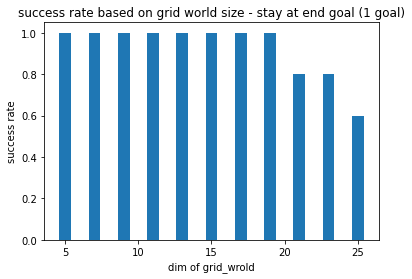

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.bar(range(5,27,2), np.reshape(results_1[:55], (-1, 5)).mean(1))
plt.title("success rate based on grid world size - stay at end goal (1 goal)")
plt.xlabel("dim of grid_wrold")
plt.ylabel("success rate")
plt.figure()

plt.bar(range(5,38,2), np.reshape(results_2, (-1, 5)).mean(1))
plt.title("success rate based on levels of complexity (2 goals)")
plt.xlabel("dim of grid_wrold")
plt.ylabel("success rate")

In [ ]:
plt.bar(range(5,38,2), np.reshape(results_3, (-1, 5)).mean(1))
plt.title("success rate based on levels of complexity (3 goals)")
plt.xlabel("dim of grid_wrold")
plt.ylabel("success rate");

In [ ]:
plt.bar(range(5,38,2), np.reshape(results_3_2, (-1, 5)).mean(1))
plt.title("success rate based on levels of complexity (3 ordered goals)")
plt.xlabel("dim of grid_wrold")
plt.ylabel("success rate");

In [ ]:
# np.reshape(results, (-1, 10)).mean(1)
# plt.plot(results)
fin_res = np.ones(30)
fin_res[5:25] = res.mean(1)
fin_res[25:] = np.reshape(results, (-1, 10)).mean(1)
fin_res

array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.9, 1. , 1. , 0.9, 1. , 1. ,
       1. , 1. , 0.8, 0.9, 0.7, 0.6, 0.9, 0.7, 1. , 0.5, 0.7, 0.7, 1. ,
       1. , 1. , 1. , 1. ])

<BarContainer object of 20 artists>

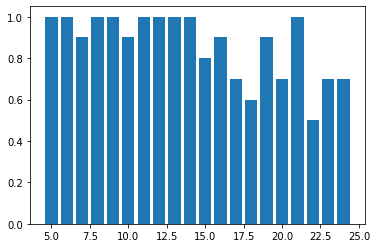

In [ ]:
# res = np.reshape(results, (20, 10))
res.mean(1)
plt.bar(range(5,25), res.mean(1))

In [ ]:
# grid_world = reset_grid_world(21)
grid_world, hash_state(grid_world)

In [ ]:
for i in N:
  print(i, N[i])

In [ ]:
t = np.array([0,0,0,0,0])
model(t.reshape(1, -1))[0][0].numpy().argmax()

In [ ]:
grid_world= reset_grid_world()
state_history, action_history, reward, possible_policy = run_episode(grid_world.copy(), model, eps=0.1)

In [ ]:
def show_movement(states):
  grid_world = reset_grid_world()
  goal_location = get_locations(grid_world, 2)
  obstacle_locations = get_locations(grid_world, -1)
  for state in states:
    i, j = int(state[0]//5), int(state[0]%5)
    grid_world[i,j] = 1
    print(grid_world)
    grid_world[i][j] = 0
    print()

print(model(np.reshape([0, -1, -1, -1, 0], (1, -1)))[0].numpy(), model(np.reshape([0, -1, -1, -1, 0], (1, -1)))[0].numpy().argmax())

In [ ]:
show_movement(state_history)

In [ ]:
# PROBLEMS:

# infinite loops
# too long tragectories, agent can't find the way
# tree search helps it NAVIGATE, but it usually gets stuck

# effect of positive/negative rewards on the path taken
    # use value functions?  
    # intermediate rewards?
    # deep MCTS?

# * turn this into a simple baseline to try out different methods (ranked rewards,...)

In [ ]:
# 1 goal
results_1=[
True, True, True, True, True, 
True, True, True, True, True, 
True, True, True, True, True, 
True, True, True, True, True, 
True, False, True, True, True, 
False, True, True, True, True, 
False, True, True, True, True, 
False, True, True, True, True, 
False, True, True, False, True, 
False, True, True, True, True, 
True, False, True, True, False, 
True, False, True, True, False, 
True, True, True, True, True, 
True, True, True, True, True, 
True, False, False, False, True, 
True, True, True, False, True, 
False, True, True, False, False]

# 2 goals
results_2=[
True, True, True, True, True, 
True, True, True, True, True, 
True, True, True, True, True, 
True, True, True, True, True, 
True, False, True, True, False, 
True, True, False, False, True, 
True, True, True, True, True, 
False, True, True, True, False, 
True, False, True, False, True, 
True, True, True, True, True, 
False, True, False, True, False, 
False, False, True, False, True, 
False, False, False, True, True, 
False, False, True, False, False, 
True, True, False, True, False, 
False, False, False, False, True,
False, False, False, False, False]

# 3 goals
results_3=[
True, True, True, True, True, 
True, True, True, True, True, 
True, True, True, True, True, 
True, True, True, False, True, 
True, False, True, True, True, 
True, True, False, False, True, 
True, True, True, True, True, 
False, True, True, True, False, 
True, False, False, True, True, 
True, False, False, False, True, 
True, True, True, True, False, 
False, False, True, False, True, 
False, False, False, True, True, 
False, True, False, False, False, 
False, False, True, True, False, 
False, False, False, True, False,
False, False, False, False, True]

# ordered goals 
results_3_2=[
True, False, False, True, True, 
True, True, True, True, True, 
True, False, False, True, True, 
True, True, False, False, True, 
True, False, True, True, True, 
False, True, False, False, True, 
False, False, False, True, True, 
False, True, True, True, False, 
True, False, False, False, True, 
False, False, False, False, True, 
False, True, False, True, False, 
False, False, False, True, False, 
True, False, False, False, False, 
False, False, False, False, False, 
True, False, False, False, False, 
False, False, True, False, False,
False, False, False, False, False]

In [ ]:
# stay at end goal results_1 
array([[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True, False],
        [ True,  True,  True, False,  True],
        [ True, False,  True, False,  True]]), [True, True])

# stay at end goals (2)
(array([[ True,  True, False,  True, False],
        [False,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [False,  True, False,  True, False],
        [ True, False, False, False, False],
        [False,  True, False, False, False],
        [False, False,  True,  True, False],
        [False, False, False,  True, False],
        [False, False,  True, False,  True],
        [False, False, False, False,  True]]),
 [False, False, False])

# stay at end goals (3)
array([[False, False, False,  True, False],
        [ True,  True, False, False, False],
        [False,  True, False,  True, False],
        [False, False, False, False, False],
        [False, False,  True, False, False],
        [False, False,  True,  True, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False]]),